In [106]:
# Para hacer los ejemplos vamos a usar la base de datos de arbolado
import pandas as pd

#arboles = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")
arboles = pd.read_csv("arbolado.csv")

arboles.head()

C:\Users\Ionatan\AppData\Local\Temp\ipykernel_9356\1598610678.py:5: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  arboles = pd.read_csv("arbolado.csv")


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


In [107]:
lista_especies = ["Photinia x fraseri", "Populus nigra"]#,"Cupressus sp."]
arbolado = arboles[arboles["nombre_cientifico"].isin(lista_especies)][["long","lat","nombre_cientifico","diametro_altura_pecho","altura_arbol"]]
arbolado.head()

,long,lat,nombre_cientifico,diametro_altura_pecho,altura_arbol
121,-58.379340,-34.606517,Photinia x fraseri,13.0,5.0
125,-58.379330,-34.606782,Photinia x fraseri,7.0,4.0
126,-58.379353,-34.606189,Photinia x fraseri,9.0,5.0
133,-58.379353,-34.606189,Photinia x fraseri,12.0,4.0
137,-58.379353,-34.606189,Photinia x fraseri,8.0,3.0


In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='long', ylabel='lat'>

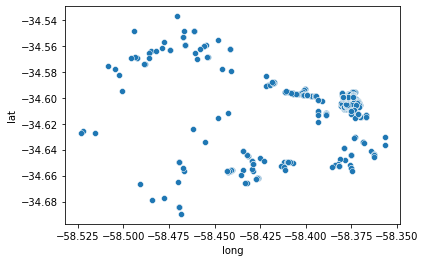

In [109]:
sns.scatterplot(data = arbolado, x='long', y='lat')

<AxesSubplot:xlabel='long', ylabel='lat'>

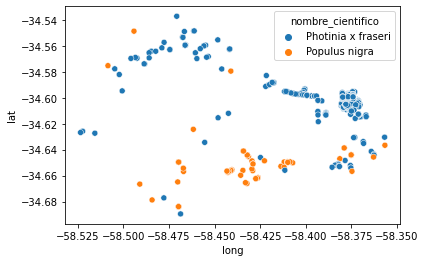

In [110]:
sns.scatterplot(data = arbolado, x='long', y='lat', hue='nombre_cientifico')

<AxesSubplot:xlabel='diametro_altura_pecho', ylabel='altura_arbol'>

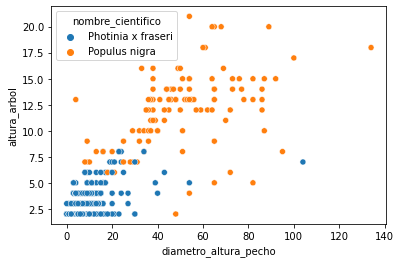

In [111]:
sns.scatterplot(data = arbolado, x='diametro_altura_pecho', y='altura_arbol', hue='nombre_cientifico')

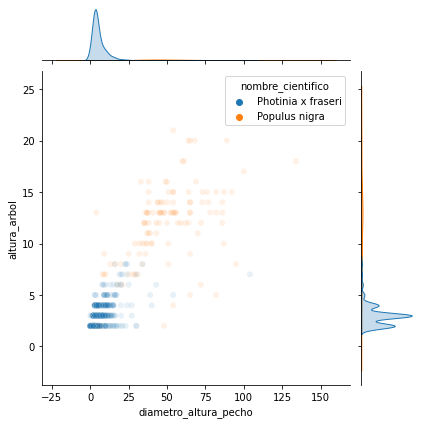

In [112]:
sns.jointplot(data = arbolado, x='diametro_altura_pecho', y='altura_arbol', hue='nombre_cientifico', alpha=0.1)

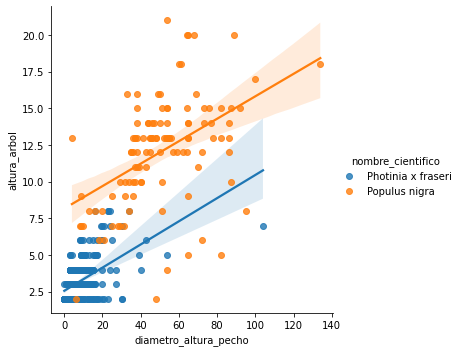

In [113]:
ax = sns.lmplot(y="altura_arbol", x="diametro_altura_pecho", data=arbolado, hue='nombre_cientifico')

# Vamos a trabajar con un modelo nuevo, de NB


- Armar un modelos de NB para clasificar los arboles. 
- Usar las caracteristicas long-lat, altura-diametro y todo junto. 
- Comparar metricas. 
- Comparen con otros modelos de los que vimos la vez pasada.

In [114]:
from sklearn.naive_bayes import GaussianNB

In [115]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [116]:
# Breve limpieza
arbolado.isna().sum()
arbolado.dropna(inplace=True)

In [136]:
model = GaussianNB()
X = arbolado.drop(columns=['nombre_cientifico'])
X = arbolado.drop(columns=['nombre_cientifico','long','lat'])
#X = arbolado.drop(columns=['nombre_cientifico','altura_arbol','diametro_altura_pecho'])
y = arbolado['nombre_cientifico']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [137]:
model.fit(X_train,y_train)

GaussianNB()

In [138]:
y_pred = model.predict(X_test)

Text(33.0, 0.5, 'Real')

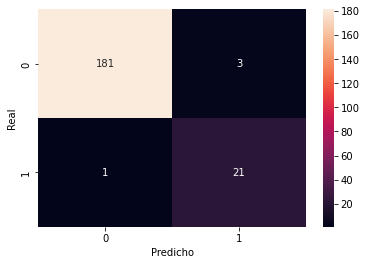

In [139]:
g = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
g.set_xlabel('Predicho')
g.set_ylabel('Real')

In [121]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred, pos_label='Populus nigra')

1.0

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # Siempre hay que comparar esto con la hipotesis nula

0.9854368932038835

In [123]:
y.value_counts(normalize=True)

Photinia x fraseri    0.891596
Populus nigra         0.108404
Name: nombre_cientifico, dtype: float64

In [124]:
# Vamos a ver otro conjunto de datos

lista_especies = ["Platanus x acerifolia", "Citrus limon"]
#arbolado = arboles[arboles["nombre_cientifico"].isin(lista_especies)][["long","lat","nombre_cientifico","diametro_altura_pecho","altura_arbol"]]
arbolado = arboles[arboles["nombre_cientifico"].isin(lista_especies)][["long","lat","nombre_cientifico"]]
arbolado.dropna(inplace=True)

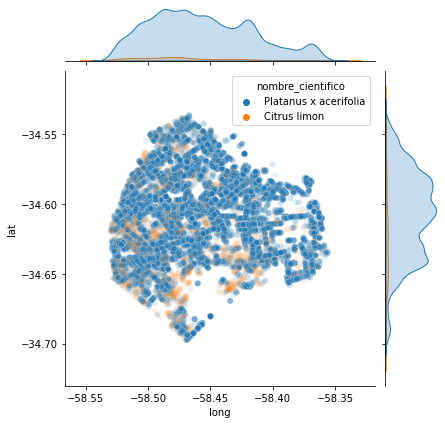

In [125]:
sns.jointplot(data=arbolado, x='long', y='lat', hue='nombre_cientifico', alpha=0.1)

In [126]:
model = GaussianNB()
X = arbolado.drop(columns=['nombre_cientifico'])
y = arbolado['nombre_cientifico']
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9492322932144626

In [127]:
y.value_counts(normalize=True)

Platanus x acerifolia    0.949351
Citrus limon             0.050649
Name: nombre_cientifico, dtype: float64

In [128]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[   0,  410],
       [   0, 7666]], dtype=int64)

Text(33.0, 0.5, 'Real')

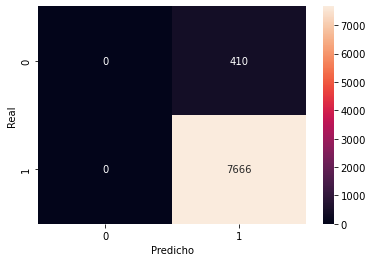

In [129]:
g = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
g.set_xlabel('Predicho')
g.set_ylabel('Real')

In [130]:
lista_especies = ["Photinia x fraseri", "Populus nigra"]#,"Cupressus sp."]
arbolado = arboles[arboles["nombre_cientifico"].isin(lista_especies)][["long","lat","nombre_cientifico","diametro_altura_pecho","altura_arbol"]]

<AxesSubplot:xlabel='long', ylabel='lat'>

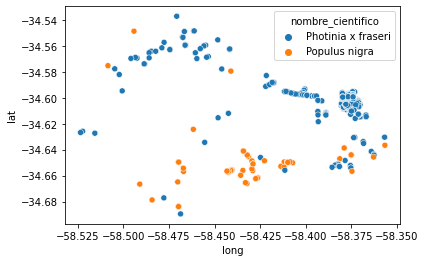

In [131]:
arbolado.dropna(inplace=True)
X = arbolado.drop(columns=['altura_arbol','diametro_altura_pecho'])

sns.scatterplot(data=X, x='long', y='lat', hue='nombre_cientifico')

In [132]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


c:\Users\Ionatan\anaconda3\envs\DH\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


<AxesSubplot:xlabel='long', ylabel='lat'>

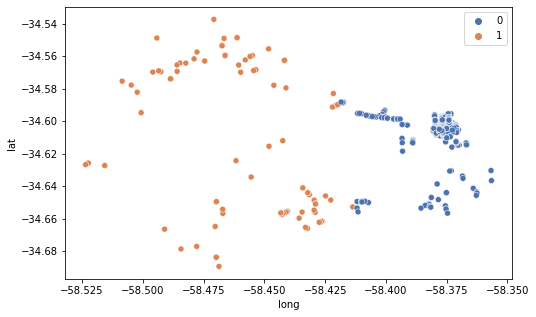

In [133]:
scaler = StandardScaler()
X = arbolado.drop(columns=['nombre_cientifico','altura_arbol','diametro_altura_pecho'])
X_sc = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
plt.figure(figsize=(8,5))
sns.scatterplot(x=X['long'], y=X['lat'], hue=kmeans.labels_, palette='deep')

In [134]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<AxesSubplot:xlabel='long', ylabel='lat'>

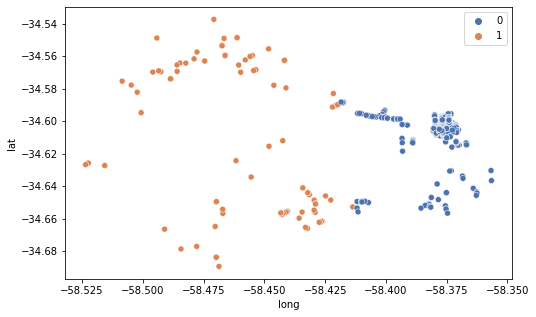

In [135]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X['long'], y=X['lat'], hue=kmeans.labels_, palette='deep')